### Schema

0. x coordinate
1. y coordinate
2. timestamp
3. pen-up
4. azimuth angle
5. altitude angle
6. Pressure

In [1]:
import pandas as pd
from os import path
import sys

#adding local modules
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio

#plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn-notebook')

doc_path = "/data/elekin/doc"
%matplotlib inline

from utils import get_abs_path

In [11]:
metadf=pd.read_csv(path.join(doc_path,"metadata-202106-v1.csv"),index_col=0)
metadf[metadf["temblor"]=='no'].sort_index()

,abs_path,relative_path,temblor,Sexo,TRS,age,level
name,,,,,,,
C01_1,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000011.svc,no,F,0.0,27.0,0.0
C01_2,/data/elekin/data/origin/ethw/Controles30jun14...,C01/session00002/u00003s00002_hw000012.svc,no,F,0.0,27.0,0.0
C02_1,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000011.svc,no,F,0.0,29.0,0.0
C02_2,/data/elekin/data/origin/ethw/Controles30jun14...,C02/session00001/u00004s00001_hw000012.svc,no,F,0.0,29.0,0.0
C03_1,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000011.svc,no,F,0.0,32.0,0.0
C03_2,/data/elekin/data/origin/ethw/Controles30jun14...,C03/session00001/u00005s00001_hw000012.svc,no,F,0.0,32.0,0.0
C04_1,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000011.svc,no,M,0.0,32.0,0.0
C04_2,/data/elekin/data/origin/ethw/Controles30jun14...,C04/session00001/u00006s00001_hw000012.svc,no,M,0.0,32.0,0.0
C05_1,/data/elekin/data/origin/ethw/Controles30jun14...,C05/session00001/u00007s00001_hw000011.svc,no,M,0.0,22.0,0.0


* 02/session00001/u00006s00001_hw00002.svc
* 11/session00001/u00004s00001_hw00001.svc 
* 23/session00001/u00016s00001_hw00001.svc
* 28/session00001/u00021s00001_hw00001.svc

**_T007_ and _T011_ doesn't have tremor level TRS. looking at the figures it is obvious they belong to the lower level of the three categories**

In [12]:
coefficients=17
et = "T001"
ct ="C01_1"

In [13]:
filename=get_abs_path(metadf, et)
for file in filename:
    print(file)

/data/elekin/data/origin/ethw/protocolo_temblor/T001/session00001/u00005s00001_hw00001.svc


In [14]:
filenameC=get_abs_path(metadf, ct)
for file in filenameC:
    print(file)

/data/elekin/data/origin/ethw/Controles30jun14/C01/session00002/u00003s00002_hw000011.svc


In [15]:
#features=['x','y','timestamp','pen_up','azimuth','altitude','pressure']
features=['x','y','timestamp','pen_up','pressure']
data = pd.read_csv(filename.iloc[0], sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])
control = pd.read_csv(filenameC.iloc[0], sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   x          2643 non-null   int64
 1   y          2643 non-null   int64
 2   timestamp  2643 non-null   int64
 3   pen_up     2643 non-null   int64
 4   pressure   2643 non-null   int64
dtypes: int64(5)
memory usage: 103.4 KB


In [17]:
data.head(10)

,x,y,timestamp,pen_up,pressure
0,1493,9752,2098403,1,6
1,1490,9752,2098411,1,168
2,1490,9752,2098418,1,328
3,1490,9752,2098426,1,480
4,1489,9752,2098433,1,667
5,1489,9752,2098441,1,791
6,1489,9752,2098448,1,889
7,1489,9752,2098456,1,967
8,1489,9752,2098463,1,1031
9,1488,9752,2098471,1,1065


In [18]:
data['r'] = extract_radio(data)
control['r'] = extract_radio(control)

data['rd']=extract_residues(data,c=coefficients)
control['rd']=extract_residues(control,c=coefficients)

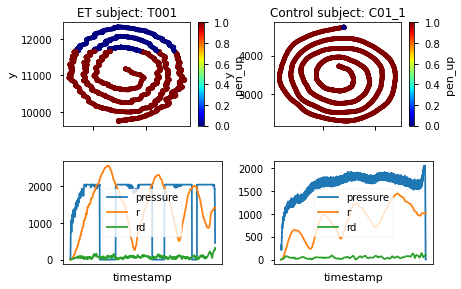

In [21]:
fig, axes=plt.subplots(2,2)
fig.tight_layout()


data.plot.scatter("x","y",c="pen_up",cmap="jet", ax=axes[0][0], title="ET subject: {}".format(et))
_=data.drop(['x','y', 'pen_up'], axis=1).plot(x=0, sharex=True, ax=axes[1][0], xticks=[])

control.plot.scatter("x","y",c="pen_up",cmap="jet", ax=axes[0][1], title="Control subject: {}".format(ct))
_=control.drop(['x','y', 'pen_up'], axis=1).plot(x=0, sharex=True, ax=axes[1][1], xticks=[])

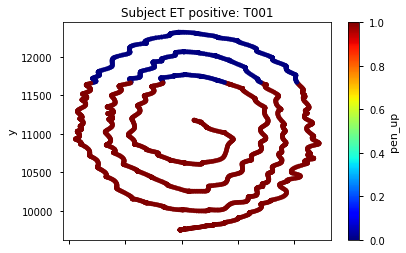

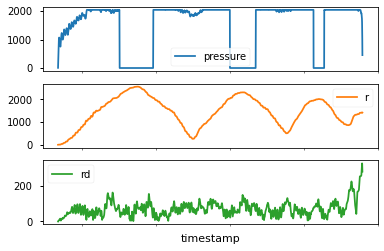

In [22]:
data.plot.scatter("x","y",c="pen_up",cmap="jet", title="Subject ET positive: {}".format(et))
_=data.drop(['x','y', 'pen_up'], axis=1).plot(x=0, subplots=True, sharex=True, xticks=[])

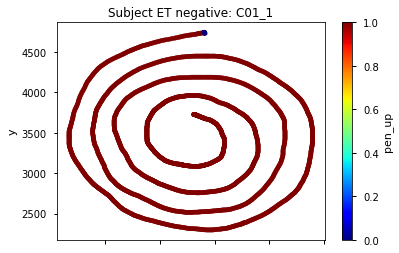

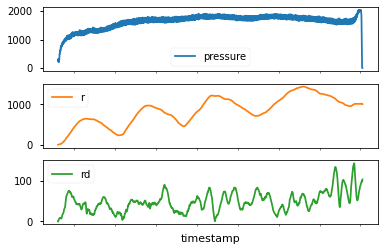

In [23]:
control.plot.scatter("x","y",c="pen_up",cmap="jet", title="Subject ET negative: {}".format(ct))
_=control.drop(['x','y', 'pen_up'], axis=1).plot(x=0, subplots=True, sharex=True, xticks=[])

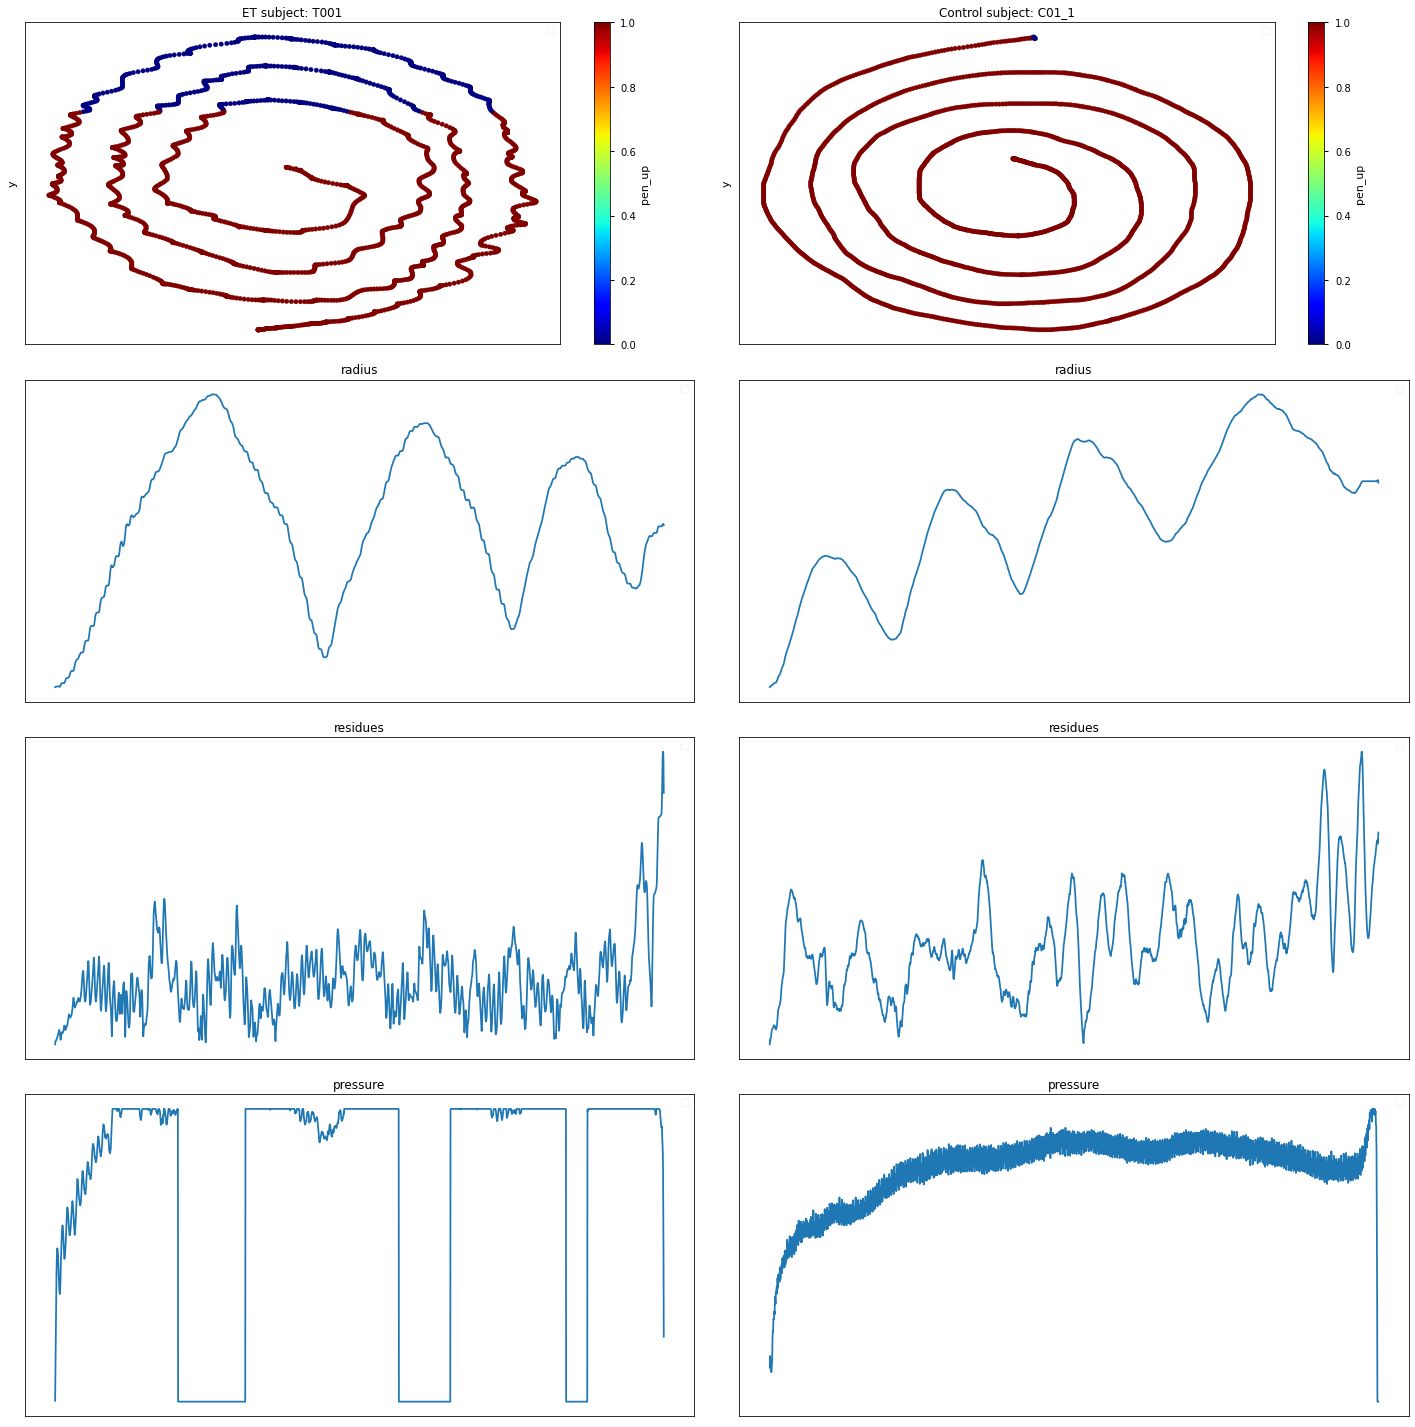

In [28]:
fig, axes=plt.subplots(4,2, figsize=[20,20])
fig.tight_layout()

data.plot.scatter("x","y",c="pen_up",cmap="jet", ax=axes[0][0], title="ET subject: {}".format(et))
data.plot(x=2,y='r', ax=axes[1][0], title="radius")
data.plot(x=2,y='rd', ax=axes[2][0], title="residues")
data.plot(x=2,y='pressure', ax=axes[3][0], title="pressure")


control.plot.scatter("x","y",c="pen_up",cmap="jet", ax=axes[0][1], title="Control subject: {}".format(ct))
control.plot(x=2,y='r', ax=axes[1][1], title='radius')
control.plot(x=2,y='rd', ax=axes[2][1], title='residues')
control.plot(x=2,y='pressure', ax=axes[3][1], title="pressure")


for row in axes:
    for ax in row:
        ax.legend([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(None)